In [1271]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1272]:
df=pd.read_csv("HINDUNILVR.csv",index_col='Date',parse_dates=True)

In [1273]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HINDUNILVR,EQ,2307.75,2324.0,2369.80,2311.00,2367.70,2360.65,2340.89,1946867,4.557405e+14,85684.0,1289103.0,0.6621
2021-04-27,HINDUNILVR,EQ,2360.65,2363.0,2386.45,2352.95,2378.00,2379.85,2374.40,1668456,3.961583e+14,84641.0,1089882.0,0.6532
2021-04-28,HINDUNILVR,EQ,2379.85,2380.0,2445.00,2366.30,2404.00,2406.55,2414.15,1951215,4.710522e+14,84910.0,1024216.0,0.5249


# Data Preprocessing

In [1274]:
df['Date']=df.index

In [1275]:
start_date='2020-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1276]:
df=df.loc[mask]

In [1277]:
df=df.ffill()

In [1278]:
df['Prev Close'].isnull().values.any()

False

In [1279]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1280]:
df.dropna(inplace=True)

<AxesSubplot:>

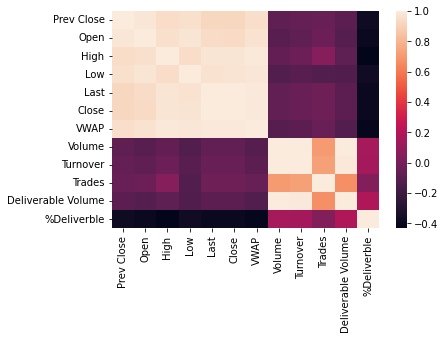

In [1281]:
sn.heatmap(df.corr())

In [1282]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=262, freq='B')

In [1283]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1284]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1285]:
Decomp_results=seasonal_decompose(df['Prev Close'])

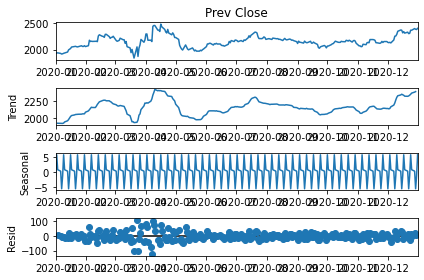

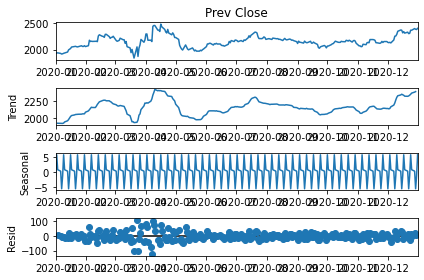

In [1286]:
Decomp_results.plot()

In [1287]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1288]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1289]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1872.511, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1885.109, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1886.113, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1885.627, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-658.396, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1885.043, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1876.230, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1806.279, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1865.642, Time=0.25 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.605 seconds


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 957.057
Date:                Sun, 25 Sep 2022   AIC                          -1886.113
Time:                        11:58:50   BIC                          -1836.156
Sample:                             0   HQIC                         -1866.034
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0020         -0        inf      0.000      -0.002      -0.002
x1             1.0000   5.75e-34   1.74e+33      0.000       1.000       1.000
x2         -4.441e-16   5.56e-34  -7.99e+17      0.000   -4.44e-16   -4.44e-16
x3          4.441e-15   5.73e-34   7.75e+18      0.000    4.44e-15    4.44e-15
x4         -1.332e-15   5.42e-34  -2.46e+18      0.000   -1.33e-15   -1.33e-15
x5         -2.665e-15   5.73e-34  -4.65e+18      0.000   -2.66e-15   -2.66e-15
x6          5.329e-15   5.71e-34   9.34e+18      0.000    5.33e-15    5.33e-15
x7          1.776e-15   5.47e-34   3.25e+18      0.000    1.78e-15    1.78e-15
x8         -8.132e-18   5.89e-29  -1.38e+11      0.000   -8.13e-18   -8.13e-18
x9          2.817e-18   1.13e-20    249.059      0.000     2.8e-18    2.84e-18
x10         1.026e-16   2.95e-31   3.47e+14      0.000    1.03e-16    1.03e-16
x11        -8.782e-18   4.45e-29  -1.97e+11      0.000   -8.78e-18   -8.78e-18
ar.L1          0.1070    9.4e-40   1.14e+38      0.000       0.107       0.107
sigma2      3.946e-05   3.94e-34      1e+29      0.000    3.95e-05    3.95e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            567045.42
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                           -14.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       229.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

# ARIMAX

In [1290]:
model_arimax=ARIMA(train,exog=exo_train,order=(1,0,0))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Low   No. Observations:                  184
Model:                     ARMA(1, 0)   Log Likelihood                 251.194
Method:                       css-mle   S.D. of innovations            269.714
Date:                Sun, 25 Sep 2022   AIC                           -474.388
Time:                        11:59:24   BIC                           -429.378
Sample:                    01-01-2020   HQIC                          -456.145
                         - 09-14-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0009      0.089     -0.010      0.992      -0.176       0.174
Prev Close          1.604e-07      0.000      0.001      0.999      -0.000       0.000
Open                 1.69e-07      0.000      0.001      0.999      -0.000       0.000
High               -1.226e-06      0.000     -0.009      0.993      -0.000       0.000
Low                    1.0000        nan        nan        nan         nan         nan
Last               -1.995e-07      0.001     -0.000      1.000      -0.002       0.002
Close               3.415e-07      0.001      0.000      1.000      -0.002       0.002
VWAP                1.894e-06      0.000      0.006      0.995      -0.001       0.001
Volume               2.79e-11   4.28e-08      0.001      0.999   -8.39e-08     8.4e-08
Turnover           -2.253e-17   3.65e-08  -6.17e-10      1.000   -7.16e-08    7.16e-08
Trades              3.792e-10   3.76e-08      0.010      0.992   -7.33e-08    7.41e-08
Deliverable Volume  1.503e-11   4.86e-08      0.000      1.000   -9.52e-08    9.52e-08
ar.L1.Low              0.1017      0.107      0.947      0.344      -0.109       0.312
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.8356           +0.0000j            9.8356            0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1291]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(1,0,0),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  184
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 350.866
Date:                Sun, 25 Sep 2022   AIC                           -675.732
Time:                        11:59:25   BIC                           -633.938
Sample:                    01-01-2020   HQIC                          -658.792
                         - 09-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close         -2.158e-13   3.63e-33  -5.94e+19      0.000   -2.16e-13   -2.16e-13
Open               -1.705e-13    3.5e-33  -4.87e+19      0.000   -1.71e-13   -1.71e-13
High                1.501e-13   3.62e-33   4.14e+19      0.000     1.5e-13     1.5e-13
Low                    1.0000   3.42e-33   2.93e+32      0.000       1.000       1.000
Last                1.048e-13   3.63e-33   2.89e+19      0.000    1.05e-13    1.05e-13
Close              -1.279e-13   3.62e-33  -3.54e+19      0.000   -1.28e-13   -1.28e-13
VWAP               -8.882e-14   3.44e-33  -2.58e+19      0.000   -8.88e-14   -8.88e-14
Volume              6.196e-17   4.13e-28    1.5e+11      0.000     6.2e-17     6.2e-17
Turnover           -1.304e-17   7.92e-20   -164.653      0.000   -1.32e-17   -1.29e-17
Trades              5.237e-17   2.03e-30   2.58e+13      0.000    5.24e-17    5.24e-17
Deliverable Volume -2.673e-17   3.12e-28  -8.57e+10      0.000   -2.67e-17   -2.67e-17
ar.L1                  0.1940   2.96e-38   6.56e+36      0.000       0.194       0.194
sigma2                 0.0013   3.95e-34   3.29e+30      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.95   Jarque-Bera (JB):            189507.87
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            12.16
Prob(H) (two-sided):                  0.17   Kurtosis:                       158.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.16e+53. Standard errors may be unstable.
"""

# Prediction

In [1292]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1293]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1294]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

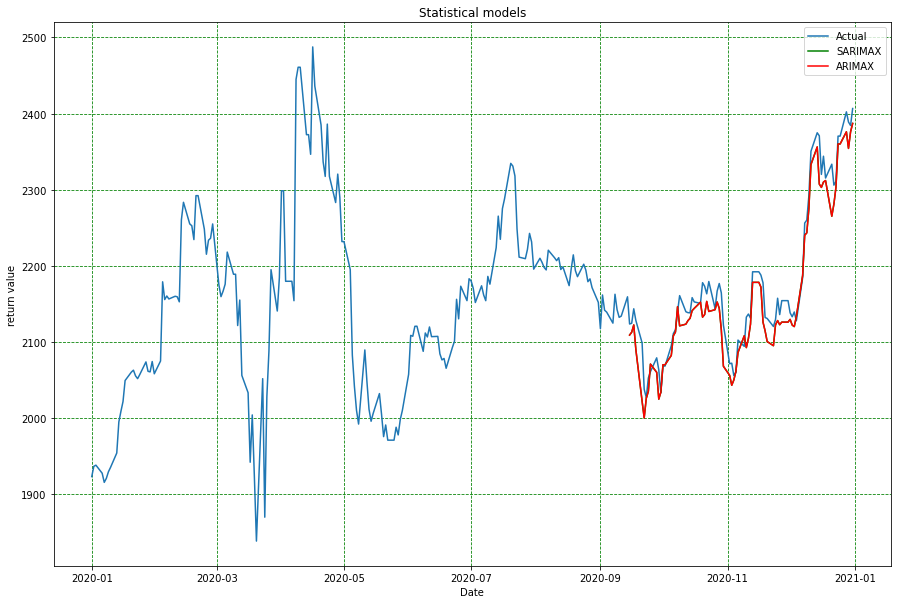

In [1295]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1296]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

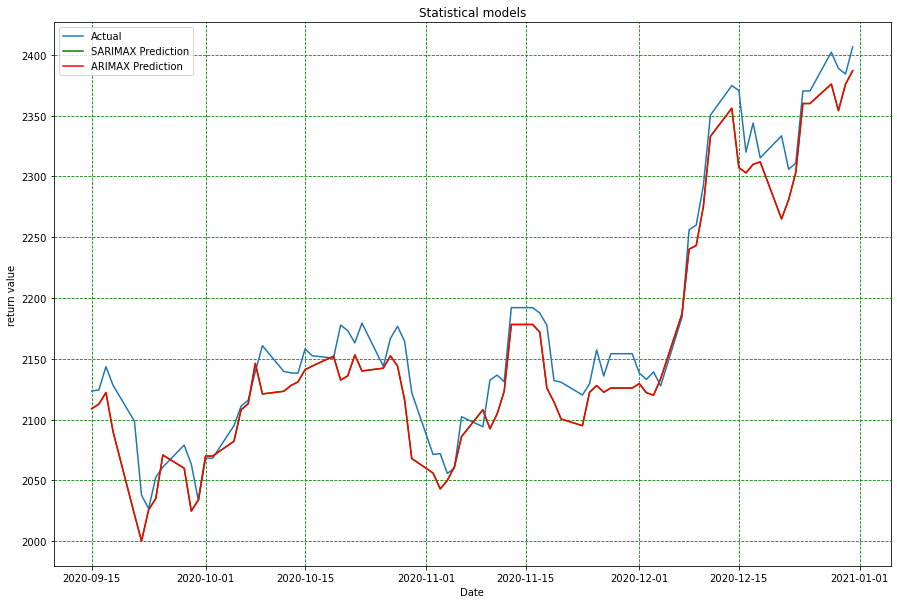

In [1297]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1298]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

26.22306741946361


In [1299]:
error=mean_absolute_error(test,pred_arimax)
print(error)

20.478000259872193


In [1300]:
r2_score(test,pred_arimax)

0.9325401094654221

    SARIMAX

In [1301]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

26.219171109504096


In [1302]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

20.474353336401208


In [1303]:
r2_score(test,pred_sarimax)

0.9325601548027574